In [9]:
#import json_helper
import requests
import json
import os
import pandas as pd

In [2]:
headers = {'token': 'QNgbHQdSKePiFYmCoeFhnmySpeiddfjl'}
url1 = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:10003&startdate=2018-01-01&enddate=2018-01-31&limit=1000&offset=1'
url2 = 'https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=FIPS:10003&startdate=2018-01-01&enddate=2018-01-31&limit=1000&offset=1001'


In [3]:
# use json_helper to load all json objects into a dataframe called df_daily_summaries
firstData = requests.get(url1, headers = headers)
secondData = requests.get(url2, headers = headers)

In [10]:
firstData.json()

{'metadata': {'resultset': {'offset': 1, 'count': 1169, 'limit': 1000}},
 'results': [{'date': '2018-01-01T00:00:00',
   'datatype': 'PRCP',
   'station': 'GHCND:US1DENC0001',
   'attributes': ',,N,',
   'value': 0},
  {'date': '2018-01-01T00:00:00',
   'datatype': 'SNWD',
   'station': 'GHCND:US1DENC0001',
   'attributes': 'T,,N,',
   'value': 0},
  {'date': '2018-01-01T00:00:00',
   'datatype': 'PRCP',
   'station': 'GHCND:US1DENC0002',
   'attributes': ',,N,',
   'value': 0},
  {'date': '2018-01-01T00:00:00',
   'datatype': 'SNOW',
   'station': 'GHCND:US1DENC0002',
   'attributes': ',,N,',
   'value': 0},
  {'date': '2018-01-01T00:00:00',
   'datatype': 'SNWD',
   'station': 'GHCND:US1DENC0002',
   'attributes': 'T,,N,',
   'value': 0},
  {'date': '2018-01-01T00:00:00',
   'datatype': 'WESD',
   'station': 'GHCND:US1DENC0002',
   'attributes': 'T,,N,',
   'value': 0},
  {'date': '2018-01-01T00:00:00',
   'datatype': 'WESF',
   'station': 'GHCND:US1DENC0002',
   'attributes': ',,N,'

In [11]:
with open('daily_summaries_FIPS10003_jan_2018_0.json', 'w') as f:
    json.dump(firstData.json(), f)

In [6]:
# display a summary of df_daily_summaries

In [24]:
import json_helper
dir(json_helper)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'json',
 'json_load',
 'json_to_dict',
 'os',
 'pd']

In [25]:
df_daily_summaries = json_helper.json_to_dict('/Users/sean/labs/PandasLabs/DataEngineering.Labs.NOAADailySummaries/data/daily_summaries')

In [27]:
df_daily_summaries

,date,datatype,station,attributes,value
0,2018-01-27T00:00:00,SNOW,GHCND:US1DENC0031,",,N,",0
1,2018-01-27T00:00:00,PRCP,GHCND:US1DENC0032,",,N,",0
2,2018-01-27T00:00:00,PRCP,GHCND:US1DENC0033,",,N,",0
3,2018-01-27T00:00:00,SNOW,GHCND:US1DENC0033,",,N,",0
4,2018-01-27T00:00:00,PRCP,GHCND:US1DENC0035,",,N,",0
...,...,...,...,...,...
995,2018-01-27T00:00:00,PRCP,GHCND:US1DENC0013,",,N,",0
996,2018-01-27T00:00:00,SNOW,GHCND:US1DENC0013,",,N,",0
997,2018-01-27T00:00:00,PRCP,GHCND:US1DENC0028,",,N,",0
998,2018-01-27T00:00:00,SNOW,GHCND:US1DENC0028,",,N,",0


How many stations are there in total for FIPS10003

In [40]:
len(df_daily_summaries)

1169

Create a DataFrame called temps_max that only contains the entries from df_daily_summaries where the datatype column is equal to TMAX. This DataFrame should only retain the date column and the value column.

In [42]:
temps_max = df_daily_summaries.loc[df_daily_summaries['datatype'] == 'TMAX', ['datatype','date', 'value']]

How many entries are there in the temps_max DataFrame? What are the mean, min, and max values?

In [45]:
temps_max.describe()

,value
count,31.000000
mean,48.193548
std,77.768640
min,-88.000000
25%,-2.500000
50%,39.000000
75%,125.000000
max,172.000000


Let's graph this DataFrame so we can get a visual representation for this information.

In [46]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [47]:
%matplotlib inline

In [63]:
x = temps_max['date'].str[8:10]
y = temps_max['value'] / 10

[Text(0.5, 0, 'day of month'),
 Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 1.0, 'Max Temperatues Jan 2018')]

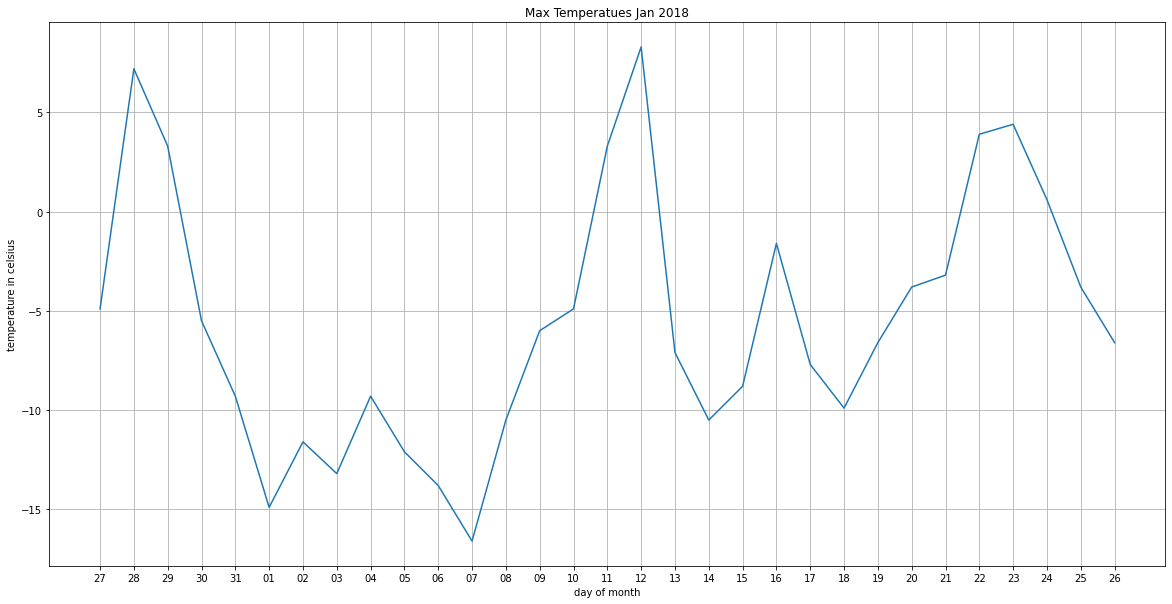

In [66]:
fig, ax = plt.subplots()
# fig is setting the size of the plot

# ax is plotting, setting up grids, and setting labels 

fig.set_size_inches(20, 10)
ax.plot(x, y)
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Max Temperatues Jan 2018')

Create a DataFrame called temps_min that only contains the entries from df_daily_summaries where the datatype column is equal to TMIN. This DataFrame should only retain the date column and the value column.

In [ ]:
# 

In [56]:
temps_min = df_daily_summaries.loc[df_daily_summaries['datatype'] == 'TMIN', ['datatype', 'date', 'value']]
                                   

How many entries are there in the temps_min DataFrame? What are the mean, min, and max values?

In [57]:
temps_min.describe()


,value
count,31.000000
mean,-55.225806
std,65.749378
min,-166.000000
25%,-102.000000
50%,-66.000000
75%,-24.000000
max,83.000000


Graph the temps_min DataFrame

In [65]:
#
x = temps_min['date'].str[8:10]
y = temps_min['value'] / 10

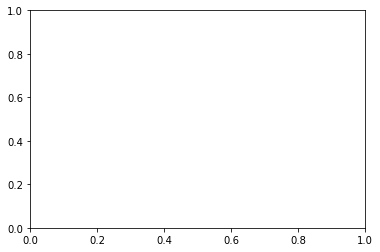

In [67]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(x, y)
ax.grid()

We can also plot both of these lines in the same graph.

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(x, temps_max['value'] / 10, color='red')
ax.plot(x, temps_min['value'] / 10, color='blue')
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Min & Max Temperatues Jan 2018')